In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / x_train.max()
x_test = x_test / x_test.max()

In [3]:
x_train[0].shape

(28, 28)

In [4]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [5]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [13]:
fashion_model = tf.keras.models.load_model('fashion_model.h5')

In [14]:
fashion_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 16)        64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          1

In [15]:
for layer in fashion_model.layers[3:]:
    layer.trainible = False

In [16]:
fashion_model.compile(optimizer='Adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [18]:
history = fashion_model.fit(x_train, y_train, batch_size=100, epochs=50, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 11s 177us/sample - loss: 0.1608 - accuracy: 0.9527 - val_loss: 0.0635 - val_accuracy: 0.9809
Epoch 2/50
60000/60000 [==============================] - 11s 178us/sample - loss: 0.0737 - accuracy: 0.9774 - val_loss: 0.0479 - val_accuracy: 0.9854
Epoch 3/50
60000/60000 [==============================] - 11s 178us/sample - loss: 0.0495 - accuracy: 0.9848 - val_loss: 0.0482 - val_accuracy: 0.9840
Epoch 4/50
60000/60000 [==============================] - 11s 177us/sample - loss: 0.0377 - accuracy: 0.9875 - val_loss: 0.0362 - val_accuracy: 0.9878
Epoch 5/50
60000/60000 [==============================] - 11s 178us/sample - loss: 0.0307 - accuracy: 0.9903 - val_loss: 0.0389 - val_accuracy: 0.9887
Epoch 6/50
60000/60000 [==============================] - 11s 180us/sample - loss: 0.0256 - accuracy: 0.9914 - val_loss: 0.0444 - val_accuracy: 0.9879
Epoch 7/50
60000/60000 [====================

(0.9, 1)

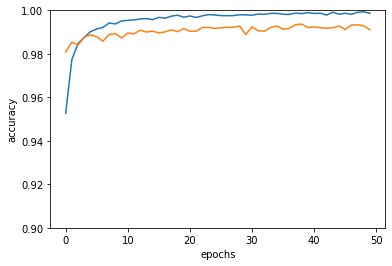

In [21]:
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.ylim(0.9, 1)

(0, 0.3)

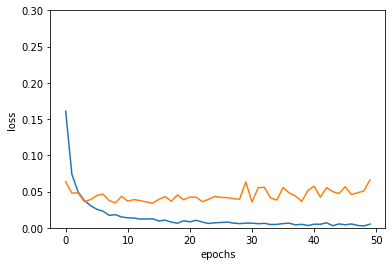

In [22]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.ylim(0, 0.3)